Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 6s 1us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [29]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.fit(train_images, train_labels, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3199 - accuracy: 0.8831
Epoch 2/3
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3124 - accuracy: 0.8861
Epoch 3/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3052 - accuracy: 0.8895


In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3623 - accuracy: 0.8701

Test accuracy: 0.8701


In [38]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [39]:
predictions = probability_model.predict(test_images)

In [40]:
predictions[28]

array([3.2540204e-09, 2.0047465e-10, 1.0711174e-09, 2.6034932e-08,
       3.4259987e-10, 3.9158599e-04, 3.5000349e-09, 5.4996669e-02,
       2.7253729e-05, 9.4458443e-01], dtype=float32)

In [41]:
np.argmax(predictions[28])

9

In [42]:
test_labels[28]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

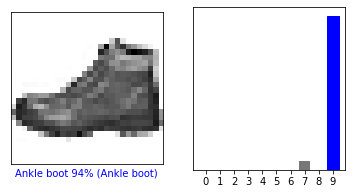

In [43]:
i = 28
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

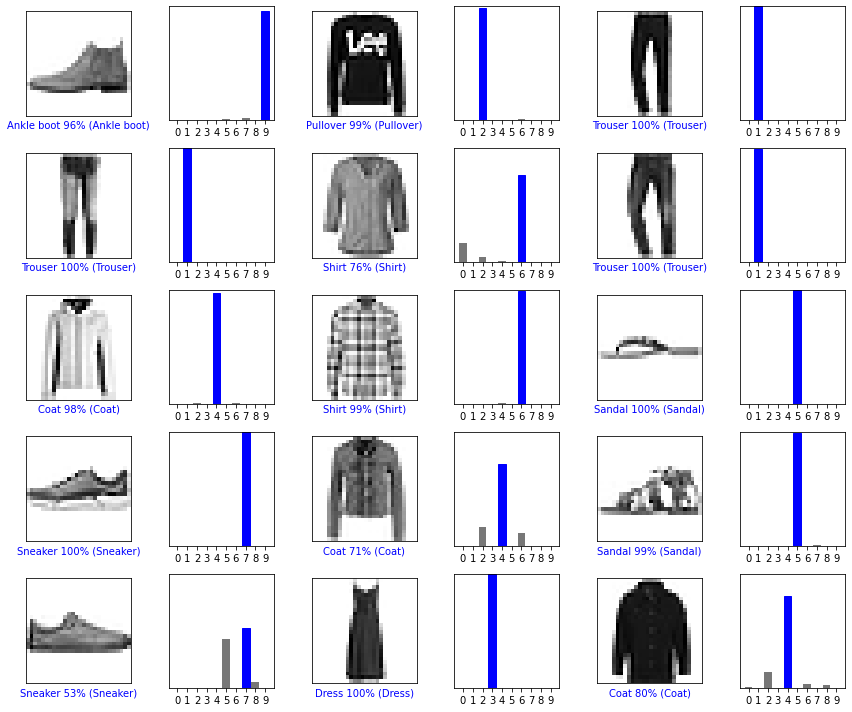

In [44]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [55]:
img = test_images[1]

print(img.shape)

(28, 28)


In [56]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [57]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.0831697e-04 2.6742773e-08 9.8902345e-01 4.4378515e-07 1.8779546e-03
  2.9484008e-08 8.5875941e-03 1.6788453e-24 2.1922631e-06 1.9483755e-20]]


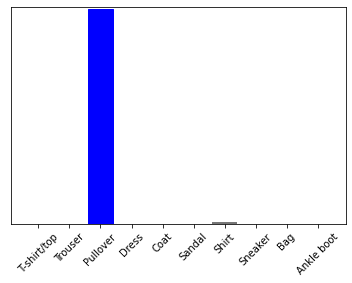

In [58]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [59]:
np.argmax(predictions_single[0])

2

Исходная модель

10000/10000 - 0s - loss: 0.4109 - accuracy: 0.8537
Test accuracy: 0.8537

Дополнительный слой 7 эпох # keras.layers.Dense(256, activation='relu'),

10000/10000 - 0s - loss: 0.4115 - accuracy: 0.8540
Test accuracy: 0.854


Дополнительный слой 5 эпох

10000/10000 - 0s - loss: 0.3780 - accuracy: 0.8654
Test accuracy: 0.8654

Дополнительный слой 3 эпохи

10000/10000 - 0s - loss: 0.3623 - accuracy: 0.8701
Test accuracy: 0.8701

Сработало добавление нового слоя, увеличеник количества эпох прироста не дало и даже немного ухудшило модель